# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [109]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [122]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/AL ML program/Python foundations/project/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [163]:
print("Number of rows:", df.shape[0],
      "Nomber of columns:", df.shape[1],
      sep= "\n")

Number of rows:
1898
Nomber of columns:
10


#### Observations:
There are 1898 rows and 9 columns in the FoodHub dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
In summary, there are 5 numerical columns and 4 string type columns in the dataset including one variable as float64, 4 variables as int64, and 4 avriables as object types.
* **Float** datatype :cost_of_the_order
* **Integer** datatype :order_id, customer_id, food_preparation_time,delivery_time     
* **Object** datatype : restaurant_name, cuisine_type, day_of_the_week,rating  


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Checking for missing values in the data and to print the sum of null values for each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There is no missing values in the data. While 'Not given' entries are present in the 'rating', they aren't empty; rather, they have been assigned a value.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
Food preparation time (in min):

* minimum time: 20
* average time: 27.37
* maximum time: 35

In summray, 25% of orders cost $12.08 or below, take about 23 minutes or below to prepare, and 20 minutes or below to deliver.50% of obeservations have the cost, food preparation and delivery time below 14.14 dollars , 27 mins and 25 mins respectively. 75% of order value 22.30 dollars and take 31 and 28 mins to be prepared and delivered, with the maximum of 35.41 dollars, 35 and 33 minutues for the same variables.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# calculate the count the unique values of rating
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
There are **736 orders** without rated values and they are assigned by "Not given".

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# provide the unique number of observations
vars = ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time']
for var in vars:
  print("Number of unique", var, "is ", df[var].nunique())

Number of unique order_id is  1898
Number of unique customer_id is  1200
Number of unique restaurant_name is  178
Number of unique cuisine_type is  14
Number of unique cost_of_the_order is  312
Number of unique day_of_the_week is  2
Number of unique rating is  4
Number of unique food_preparation_time is  16
Number of unique delivery_time is  19


#### observations:

* Order-id and customr-id have 1898 and 1200 unique observations, respectively. Order-id have a unique id where custmor-id cannt be a unique id beascue the same customr can place multi orders.
*  FoodHub company offers access to 178 restaurants with 14 various cusine type.

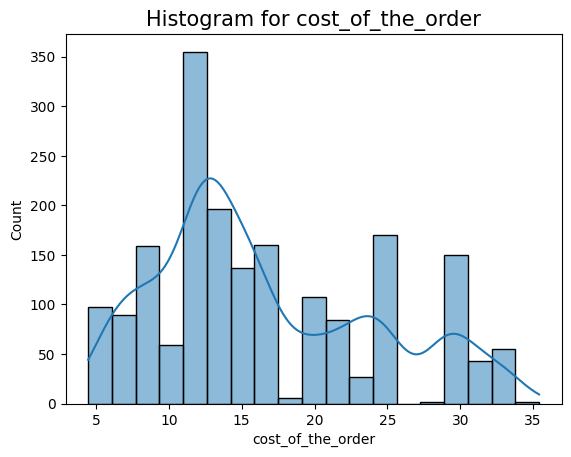

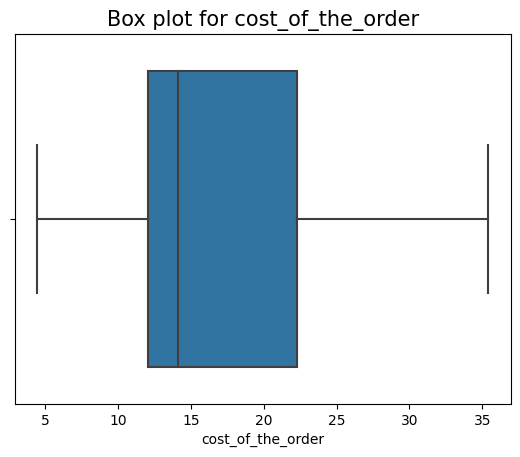

****************************************************************************************************


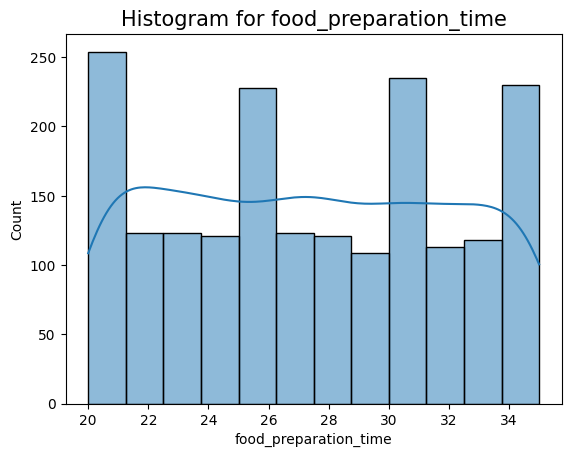

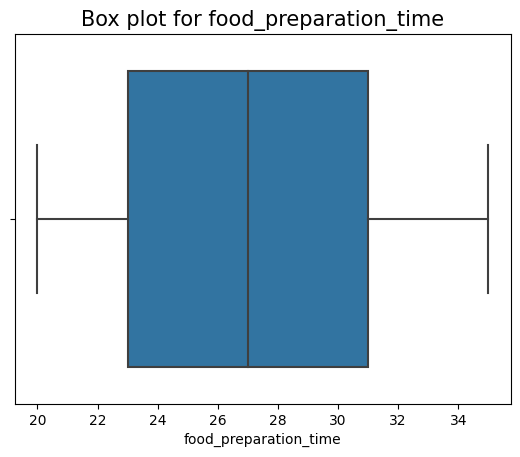

****************************************************************************************************


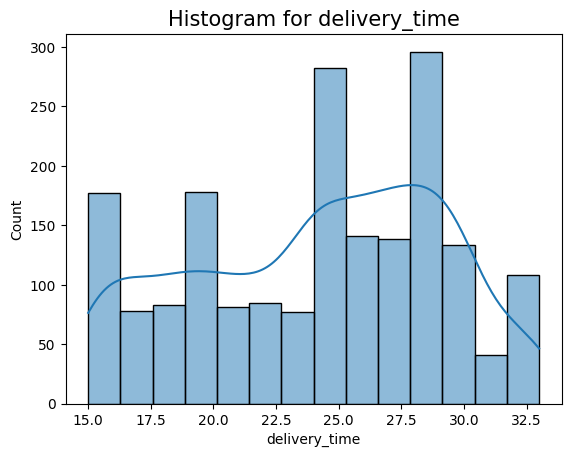

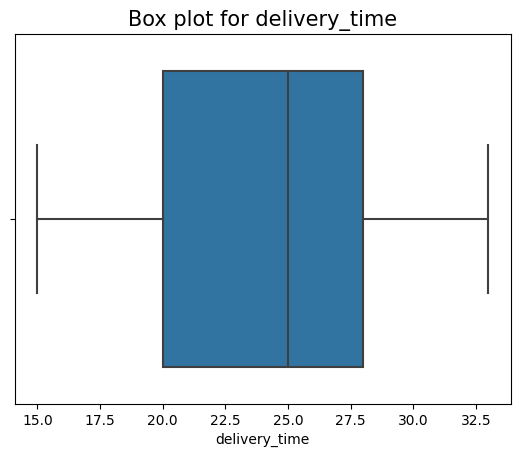

****************************************************************************************************


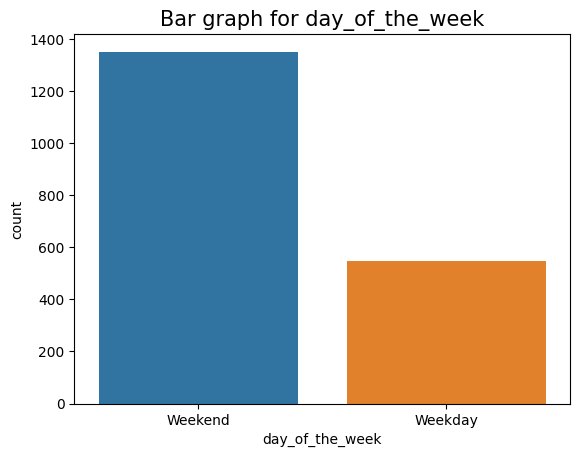

****************************************************************************************************


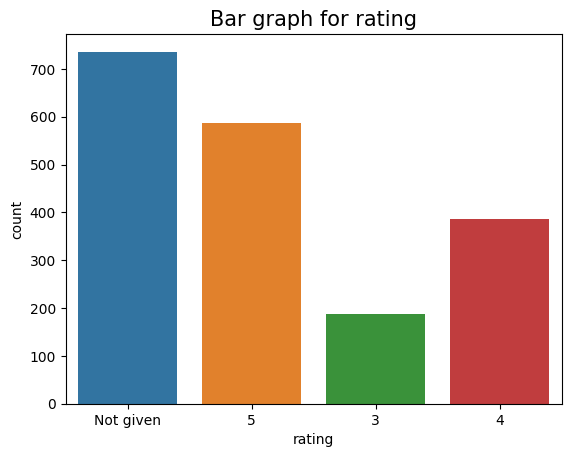

****************************************************************************************************


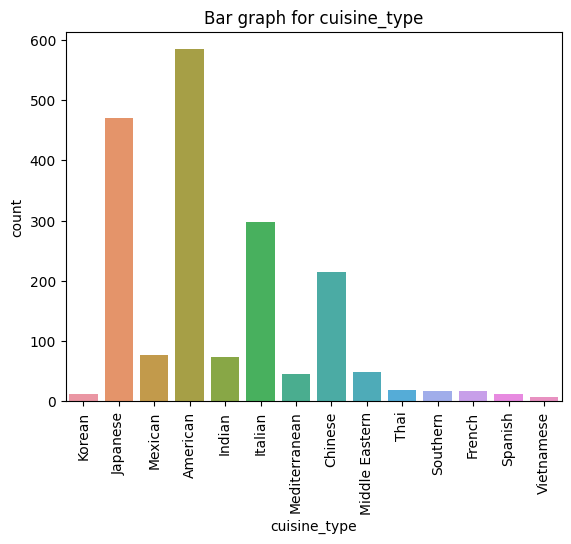

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


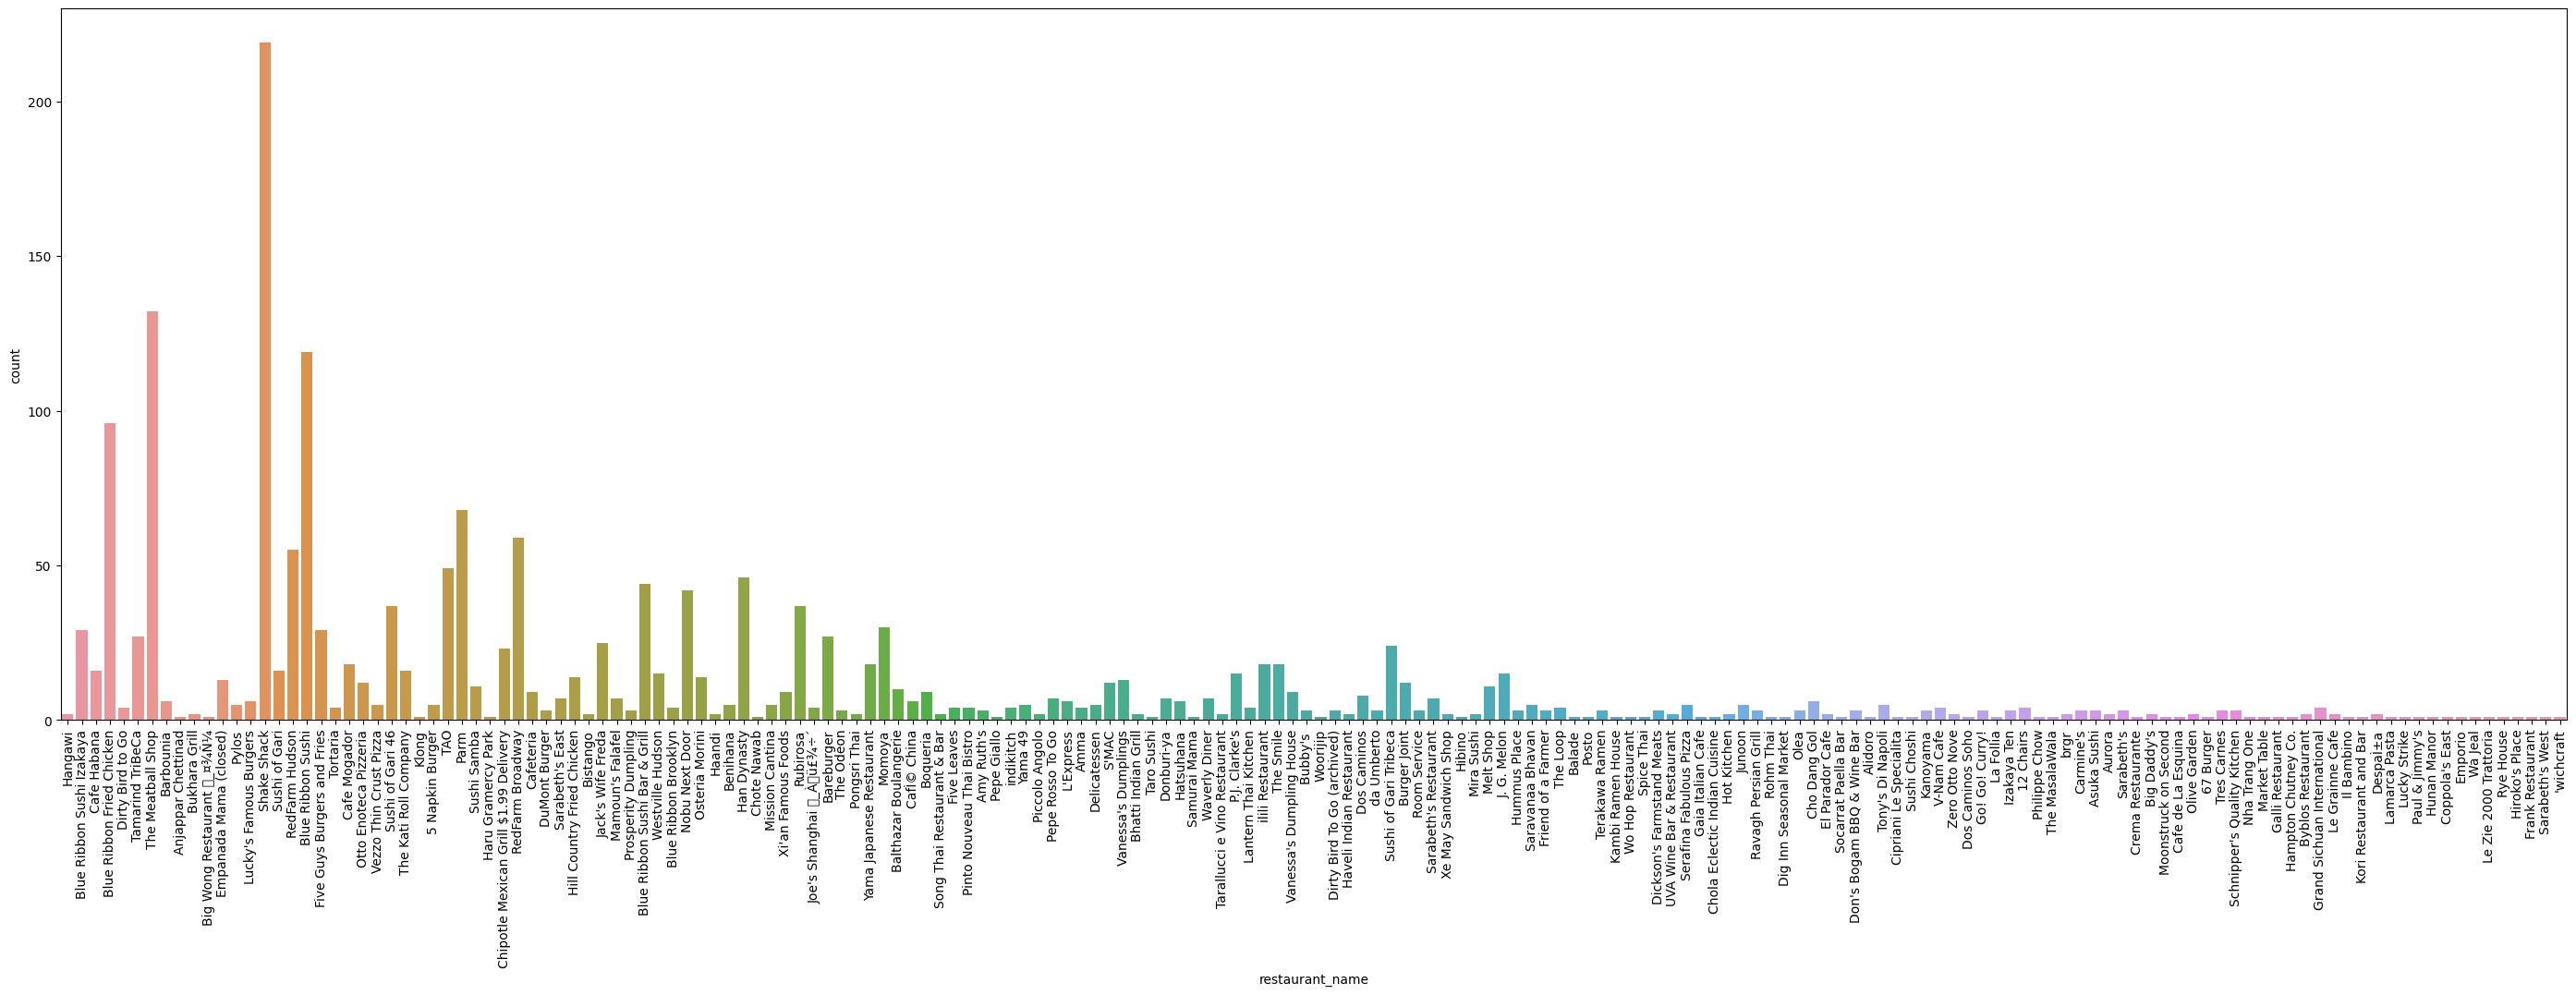

In [ ]:
# plot histogram and boxplot for cost of the order, food preparation time and delivery time
num_vars = ["cost_of_the_order", "food_preparation_time", "delivery_time"]
for var in num_vars:
  plt.title("Histogram for "+ var,
            fontsize = 15)
  sns.histplot(data = df,
               x = var,
               kde = True)
  plt.show()
  plt.title("Box plot for "+ var,
            fontsize = 15)
  sns.boxplot(data = df,
              x = var)
  plt.show()
  print("*" * 100)

# plot a bar graph for on restaurant_name, cuisine_type, day_of_the_week, rating
cat_vars = ["day_of_the_week", "rating"]
for var in cat_vars:
  plt.title("Bar graph for " + var,
            fontsize = 15)
  sns.countplot(data = df,
                x = var)
  plt.show()
  print("*" * 100)

# plot a bar graph for cuisine_type
sns.countplot(data = df,
                x = "cuisine_type")
plt.title("Bar graph for cuisine_type")
plt.xticks(rotation = 90)
plt.show()
print("*" * 100)

# plot a bar graph for on restaurant_name
plt.figure(figsize = (35, 10))
sns.countplot(data = df,
                x = "restaurant_name")
plt.xticks(rotation = 90)
plt.xlabel("restaurant_name")
plt.show()



#### Observations:
* The histogram of order costs is right-skewed, predominantly concentrated at lower prices, with notable peaks around 25 and 30 dollars. The box plot show a median cost of approximately 14, indicating a right-skewed distribution, with a significant spread above the median. This could imply different customer segments - possibly students focusing on lower-cost options (left peak) and professionals with higher incomes opting for pricier meals (right peaks). On average, orders cost around 16 dollars, with more than 50% of orders below $14.

* The distribution of food preparation time appears fairly symmetric, with mean and median values aligned at around 27 minutes. On average, meals take approximately 27 minutes to prepare, ranging from a minimum of 20 to a maximum of 36 minutes.

* The median delivery time is approximately 25 minutes, exhibiting a left-skewed distribution with a median greater than the mean. Most orders are delivered within the range of 25 to 28 minutes, while only 25% of orders take less than 20 minutes.

* There is a higher volume of orders placed on weekends, nearly double the number compared to weekdays.

* The 'Not Given' rating prevails among other ratings, while Rating 3 is the least frequent.

* American cuisine has the highest demand, followed by Japanese and Italian cuisines. Vietnamese cuisine appears to have lower popularity among customers.

* Shake Shack restaurant stands out with the highest number of orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Check the top 5 restaurants with highest number of orders
df["restaurant_name"].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

As depicted above, the following restaurants rank among the top 5 in terms of the number of orders they've received.
*   Shake Shack
*   The Meatball Shop
*   Blue Ribbon Sushi
*   Blue Ribbon Fried Chicken
*   Parm





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Check the most popular cuisine in weekends
df.loc[df["day_of_the_week"] == "Weekend"]["cuisine_type"].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
During weekends, the most sought-after cuisine is **American**, with 415 orders, followed by Japanese and Italian cuisines.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [6]:
# Calculate percentage of orders that cost more than 20 dollars
percent_order = df[df["cost_of_the_order"] > 20]["order_id"].shape[0]/df.shape[0]*100
print("Percentage of orders greater than 20 dollars: ",
      round(percent_order, 2), "%")

percentage of orders greater than 20 dollars:  29.24 %


#### Observations:
Approximately 29.24 percent of orders exceed the cost of $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Check the mean delivery time
round(df["delivery_time"].mean(), 2)

24.16

#### Observations:
The mean order delivery time is about 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# check the top 3 most frequent customers
df["customer_id"].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The follwoing customer IDs represent the three most frequent customers eligible to receive 20% discount vouchers.



* **52832** with 13 orders
* **47440** with 10 orders
* **83287** with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


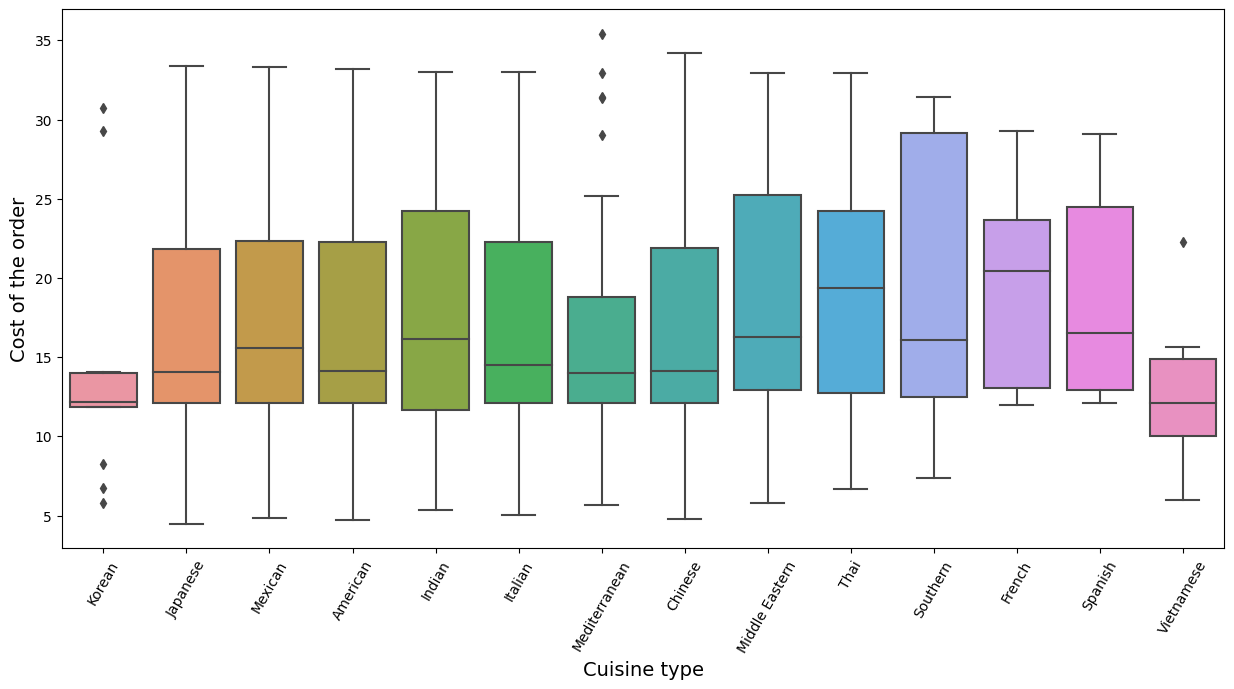

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize = (15,7))
sns.boxplot(data= df, x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation = 60)
plt.xlabel("Cuisine type", fontsize =14)
plt.ylabel("Cost of the order", fontsize =14)
plt.show()

#### Observations:
* Costs of orders vary across different cuisine types.
* Outliers are observed in Korean, Mediterranean, and Vietnamese cuisines, indicating some orders are either very expensive or very cheap. For instance, certain Mediterranean orders cost above 30 , while certain Korean orders are priced at less than 10 dollars.
* French cuisine boasts the highest mean cost, followed by Thai cuisine, whereas Vietnamese cuisine exhibits the lowest mean cost compared to other cuisine types.
* Approximately 50% of orders from Japanese, American, Italian, Mediterranean, and Chinese cuisines have an average cost of around $15





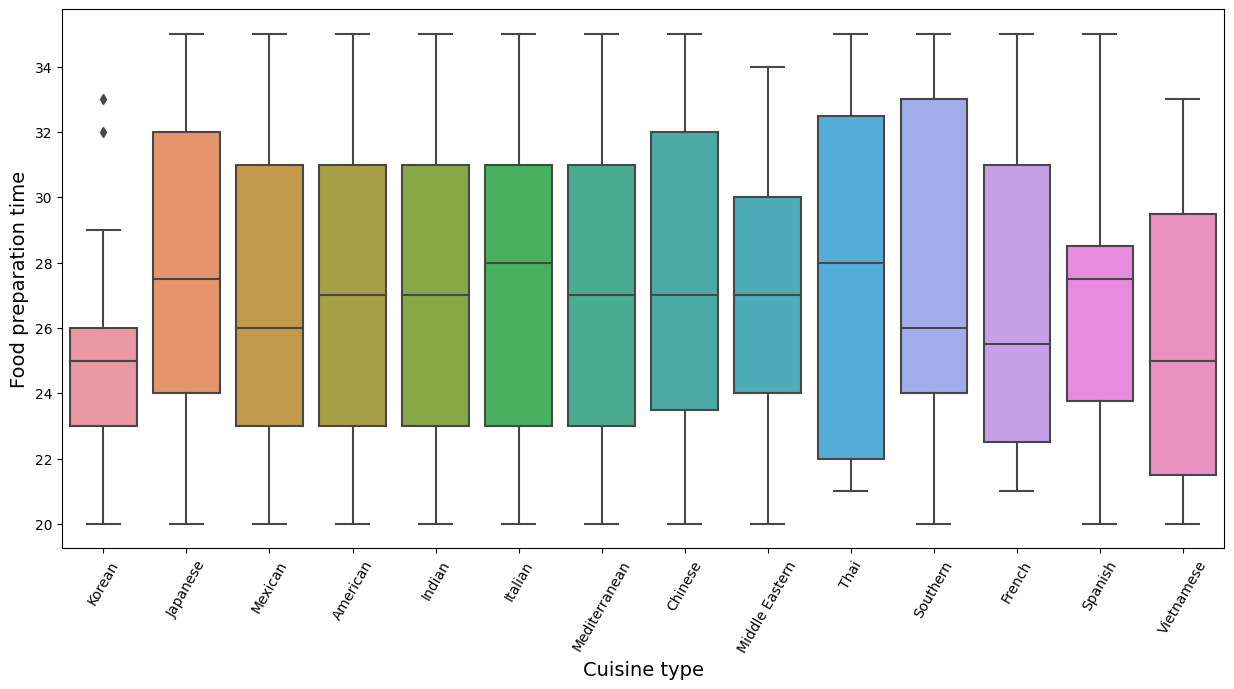

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize = (15,7))
sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time")
plt.xticks(rotation = 60)
plt.xlabel("Cuisine type", fontsize =14)
plt.ylabel("Food preparation time", fontsize =14)
plt.show()

#### Observations:

* The minimum food preparation time across cuisine types is typically 20 minutes, except for French and Thai cuisines, which have a minimum preparation time of 21 minutes.
* On average, Italian and Thai cuisines require a longer food preparation time, averaging around 28 minutes. Conversely, Vietnamese and Korean cuisines have a lower mean food preparation time of approximately 25 minutes.
* Although Korean cuisine displays two outliers with unusually long preparation times (above 32 mins), 75% of Korean orders are prepared in less than 26 minutes.
* Middle Eastern, American, Indian, Mediterranean, and Chinese cuisines have similar average food preparation times among all cuisine types.


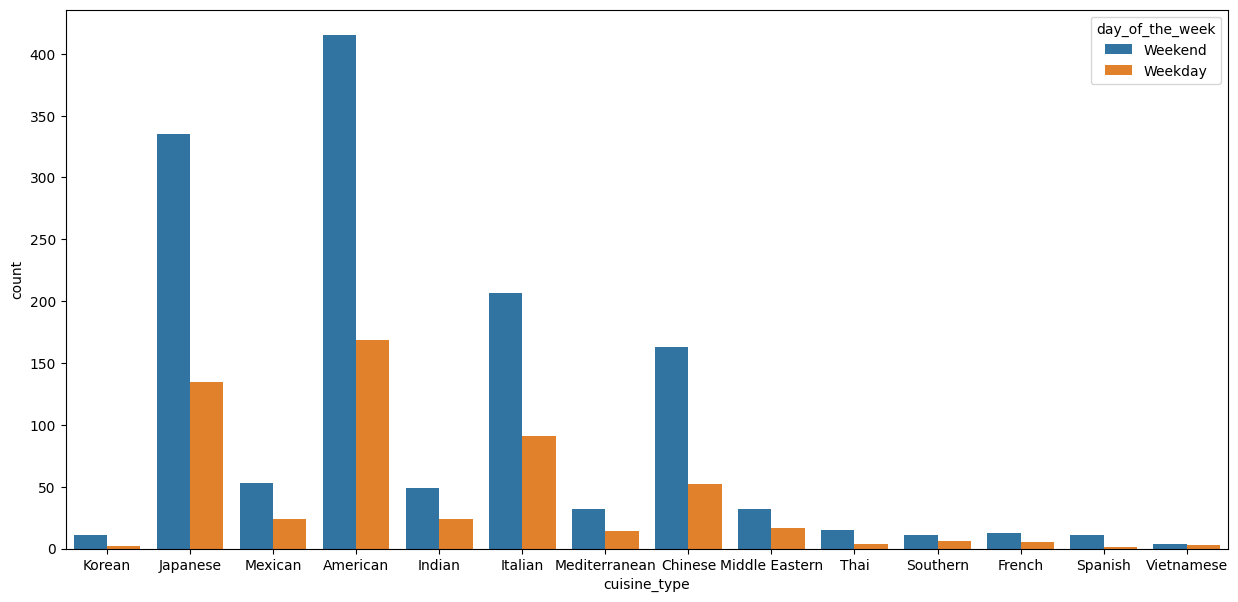

In [7]:
# Cusinie type vs day of the week
plt.figure(figsize = (15,7))
sns.countplot(data =df, x = "cuisine_type", hue = "day_of_the_week")
plt.show()

#### Observations:
* It's evident that orders during the weekend surpass those during weekdays across all cuisine types.

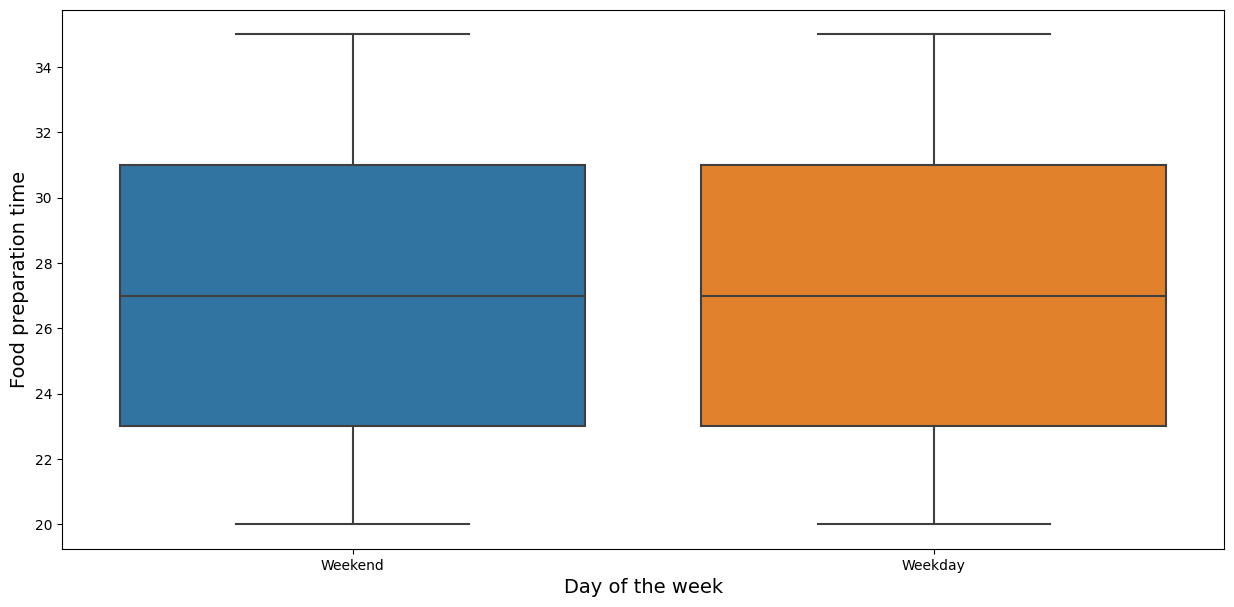

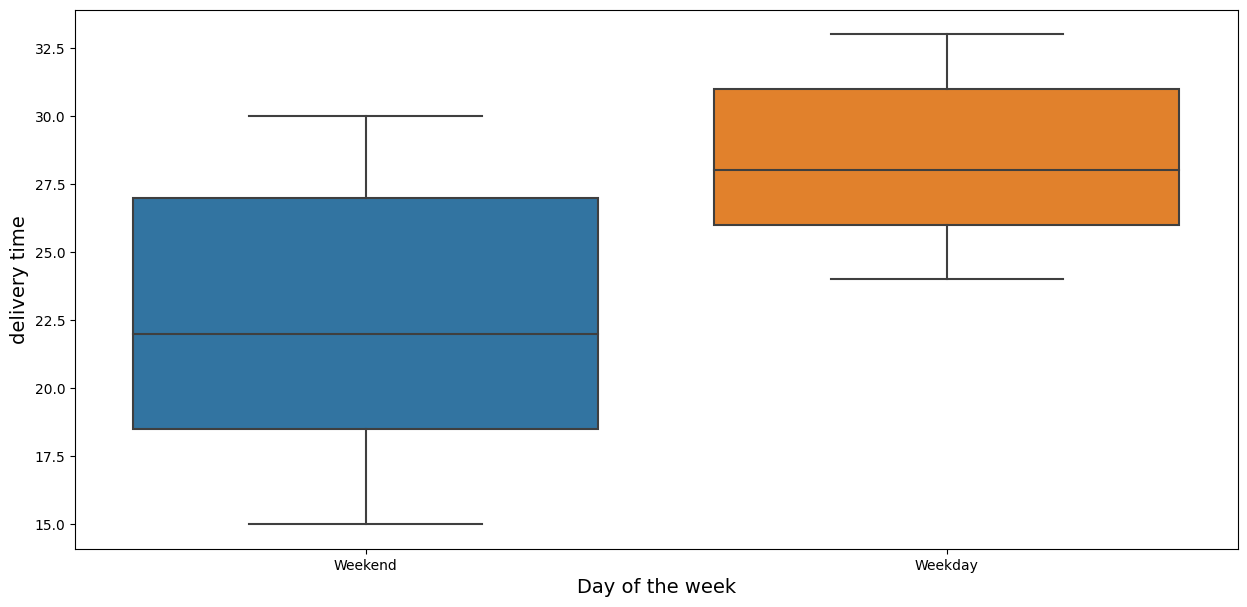

In [ ]:
# Relationship between day of the week and Food preparation time
plt.figure(figsize = (15,7))
sns.boxplot(data = df, x = "day_of_the_week", y = "food_preparation_time")
plt.xlabel("Day of the week", fontsize =14)
plt.ylabel("Food preparation time", fontsize =14)
plt.show()

# Relationship between day of the week and delivery time
plt.figure(figsize = (15,7))
sns.boxplot(data = df, x = "day_of_the_week", y = "delivery_time")
plt.xlabel("Day of the week", fontsize =14)
plt.ylabel("delivery time", fontsize =14)
plt.show()

#### Observations:
There appears to be no significant difference between the day of the week and food preparation time. However, a noticeable contrast emerges between the day of the week and delivery time. As depicted in the second boxplot, food takes considerably longer to be delivered on weekdays, likely attributed to traffic congestion during these days. Conversely, delivery times are notably quicker during the weekends.

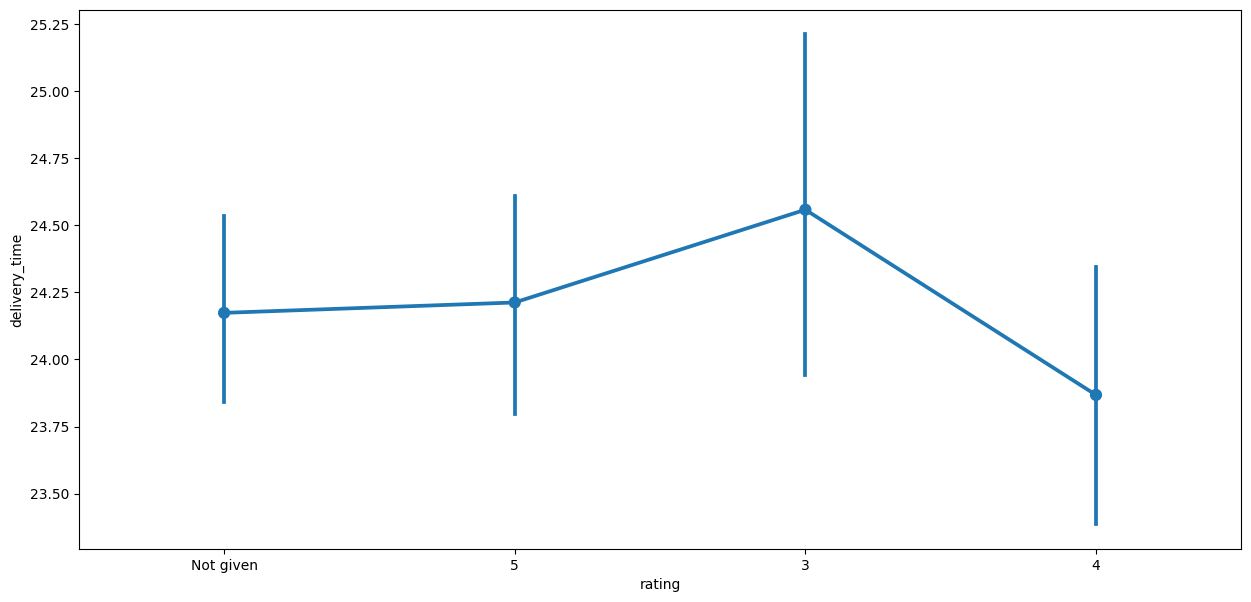

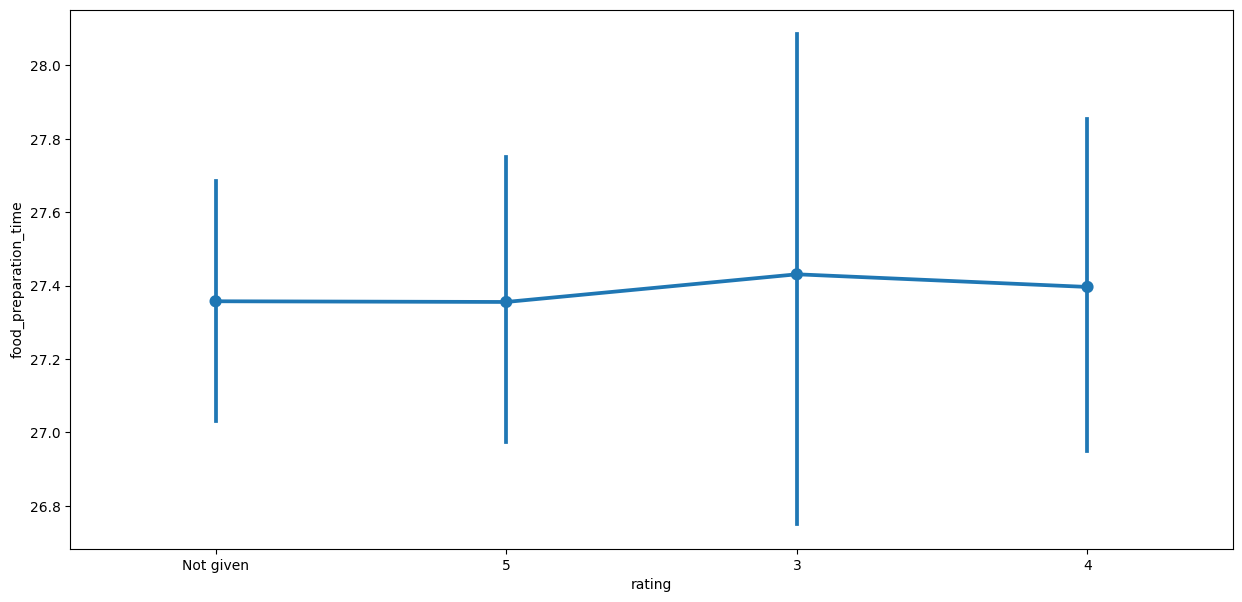

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x = "rating", y = "delivery_time")
plt.show()

# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data =df, x = "rating", y = "food_preparation_time")
plt.show()

#### Observations:

 * Orders with larger delivery times tend to receive lower ratings.
 * There isn't a significant difference between food preparation time and the average rating. So there isn't a clear correlation between food preparation time and the ratings received. However, food preparation times exceeding approximately 27.8 minutes tend to receive lower ratings of 3.

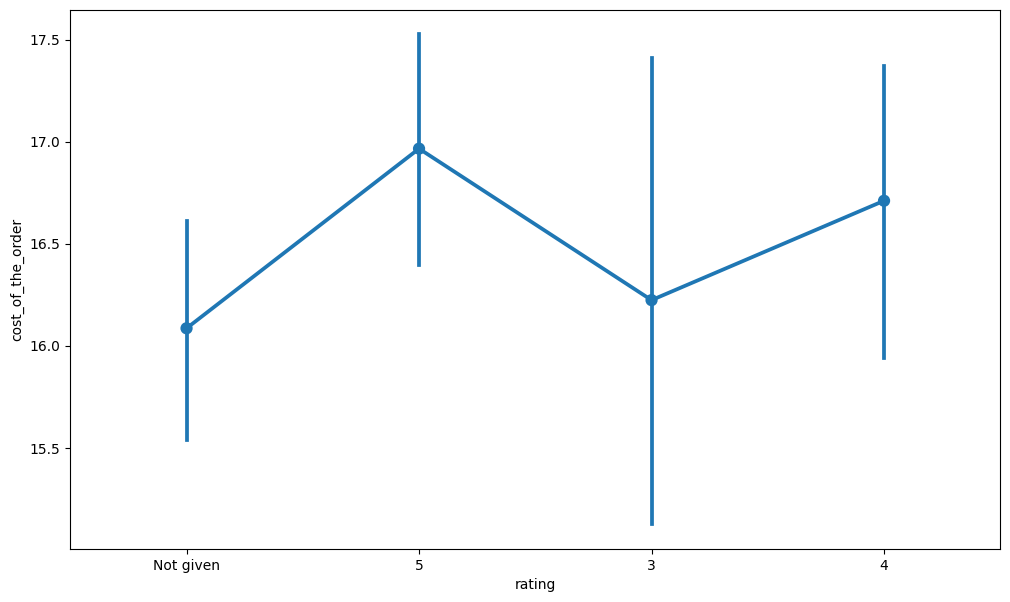

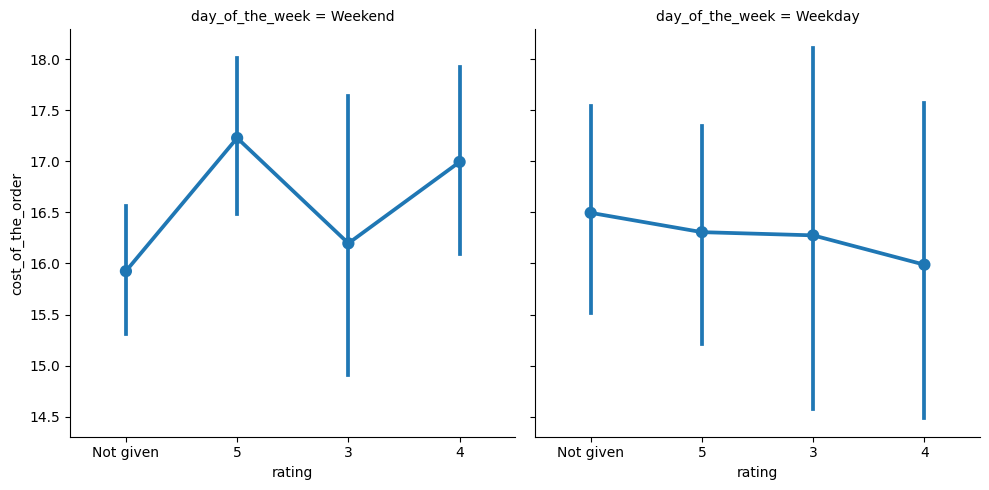

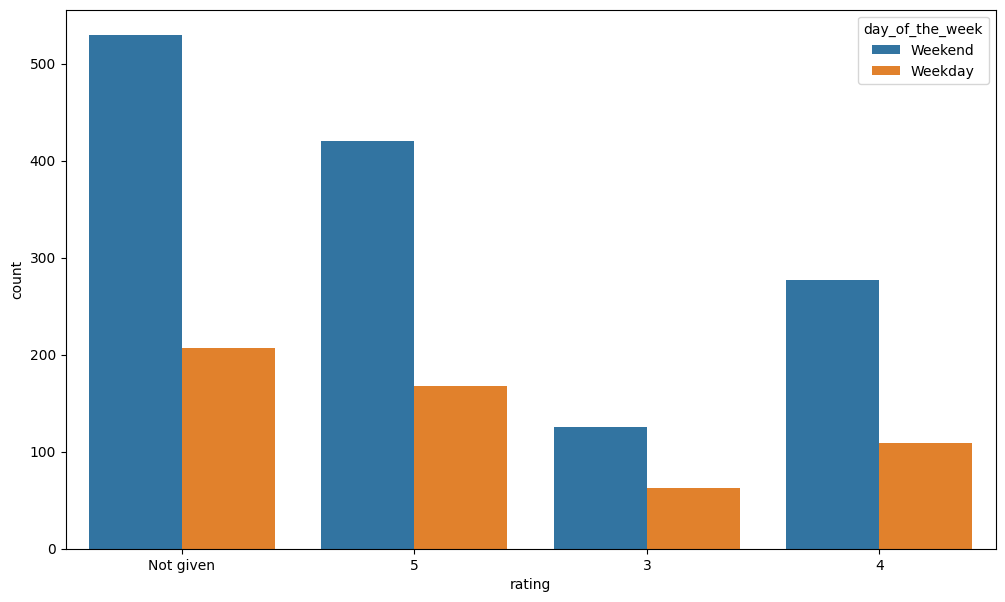

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(12, 7))
sns.pointplot(data = df, x = "rating", y = "cost_of_the_order")
plt.show()

# Relationship between rating and cost of the order by day of week
sns.catplot(x='rating', y='cost_of_the_order', data=df,
                col='day_of_the_week', kind="point")
plt.show()

# relationship between rating and day of week
plt.figure(figsize=(12, 7))
sns.countplot(x='rating', data=df,
                hue='day_of_the_week')
plt.show()

#### Observations:
* Orders with higher costs tend to receive full ratings, whereas orders with lower costs are more likely to receive rating lower rating.

* We can see from the second graph, it becomes evident that the entire behaviour in the dataset is notably influenced by the weekend. The relationship between the rating and the cost of orders exhibits a completely different pattern during the weekend compared to weekdays.

* Based on the bar graph, it's evident that orders tend to receive higher ratings during the weekend compared to weekdays,approximately twice as many across all rating values, that would suggest a substantial rating preference for orders during the weekend over weekdays

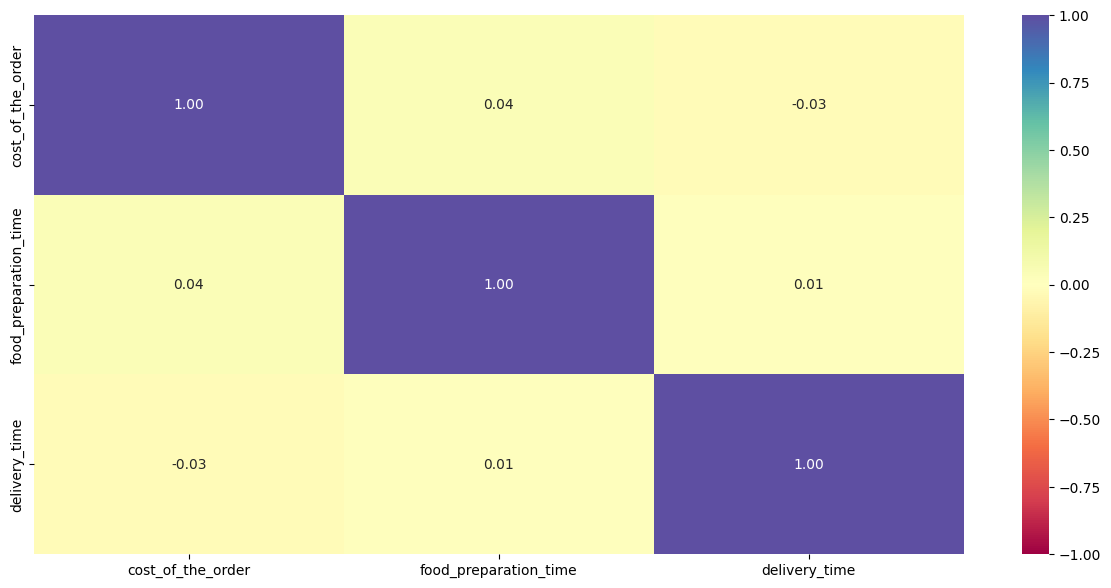

In [ ]:
# Correlation between cost of the order, food preparation time,and delivery time
# df["rating"] =pd.to_numeric(df["rating"], errors= "coerce") #to look at correlation between rating and other numerical columns, need to be converetd to numerical values.
plt.figure(figsize=(15, 7))
sns.heatmap(df[["cost_of_the_order", "food_preparation_time", "delivery_time"]].corr(),
            vmin = -1, vmax = 1,
            cmap = "Spectral",
            annot = True,
            fmt = ".2f")
plt.show()


#### Observations:
* There is no strong correlation between cost of the order, food preparation time,and delivery time.

<Figure size 2000x700 with 0 Axes>

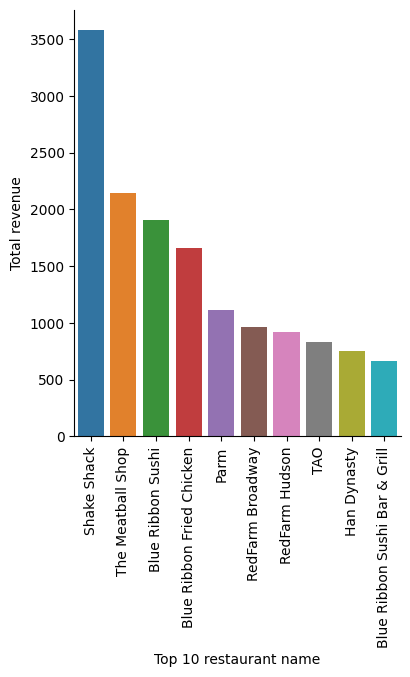

In [111]:
# Find the restuarant names with highest order revenue
top10_restuarant = df.groupby("restaurant_name")["cost_of_the_order"].sum().sort_values(ascending= False).reset_index().head(10)
top10_restuarant = top10_restuarant.rename(
    columns = {"cost_of_the_order" : "Total revenue"})

plt.figure(figsize = (20,7))
sns.catplot(data = top10_restuarant, x = "restaurant_name", y = "Total revenue", kind ="bar")
plt.xticks(rotation = 90)
plt.xlabel("Top 10 restaurant name")
plt.show()

#### Observations:
**Shake Shack** has the highest revenue among all restaurants. As observed, there is a significant difference among the top 10 restaurants regarding their total revenue. Shake Shack's revenue is five times higher than that of Blue Ribbon Sushi Bar & Grill, which is the lowest among the top 10 restaurants

The top three rated cuisine type are 
0   4.83
1   4.67
2   4.54
Name: mean, dtype: float64




<Figure size 2000x700 with 0 Axes>

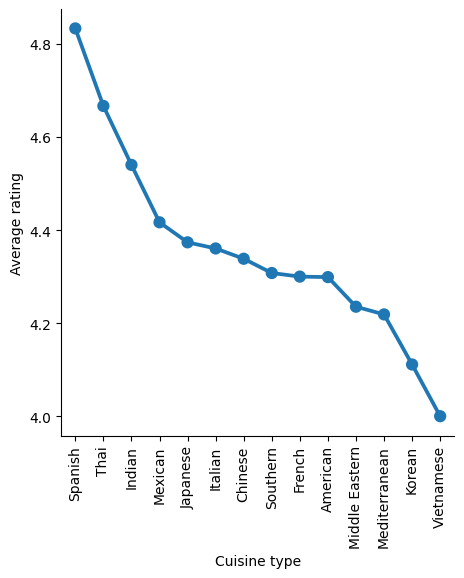

In [42]:
# relationship between cuisine type and rating
df_rated_cuisine = df[["cuisine_type", "rating"]][df["rating"] != "Not given"]
df_rated_cuisine["rating"] = df_rated_cuisine["rating"].astype("int64")
top_rated_cuisine = df_rated_cuisine.groupby("cuisine_type")["rating"].agg(["count", "mean"]).sort_values(by = "mean", ascending = False).reset_index()
print("The top three rated cuisine type are ", top_rated_cuisine["mean"].head(3), sep = "\n", end ="\n\n\n")

#plot the average rating by cuisine type
plt.figure(figsize = (20,7))
sns.catplot(data = top_rated_cuisine, x = "cuisine_type", y = "mean", kind ="point")
plt.xticks(rotation = 90)
plt.xlabel("Cuisine type")
plt.ylabel("Average rating")
plt.show()

#### Observations:
* Spanish cuisine stands out with the highest average rating of about 4.8, followed by Thai and Indian cuisine types. On the contrary, Vietnamese cuisine shows the lowest average rating compared to the other types of cuisines.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [179]:
# filter retaed resturants
df_rated_resturants = df[["restaurant_name", "rating"]][df["rating"] != "Not given"]

# convert rating column from object to integer datatype
df_rated_resturants["rating"] = df_rated_resturants["rating"].astype("int64")

# count number of rating for each resturant
df_rated_count = df_rated_resturants.groupby("restaurant_name")["rating"].count().sort_values(ascending= False).reset_index()

# Get the restaurant names that have rating count more than 50
df_50_ratecount = df_rated_count.loc[df_rated_count["rating"] > 50]["restaurant_name"]

# Filter to get the data of restaurants that have rating count more than 50
df_named = df_rated_resturants[df_rated_resturants['restaurant_name'].isin(df_50_ratecount)]

#find the mean rating of the restaurants to get the promotional offer
df_mean_rate = df_named.groupby("restaurant_name")["rating"].mean().sort_values(ascending = False).reset_index()

print("These resturants fulfilling the criteria to get the promotional offer: ", df_mean_rate, sep="\n")

These resturants fulfilling the criteria to get the promotional offer: 
             restaurant_name  rating
0          The Meatball Shop    4.51
1  Blue Ribbon Fried Chicken    4.33
2                Shake Shack    4.28
3          Blue Ribbon Sushi    4.22



# Observations:

The following 4 restaurants have more than 50 ratings with the average rating of greater than 4.

*  The Meatball Shop with highest mean rating of 4.51.
*  Blue Ribbon Fried Chicken with an average rating of 4.33.
*  Shake Shack with 4.28 average rating.
*  Blue Ribbon Sushi with an average rating of 4.22.




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [182]:
# define a function to determine the revenue
def order_charged(order):
  if order > 20:
    return order * 0.25
  elif order > 5:
    return order * 0.15
  else:
    return order * 0

# calculate the revenue
df["revenue"] = df["cost_of_the_order"].apply(order_charged)

# calculate total revenue
tot_revenue = round(df["revenue"].sum(), 2)
print("Total revenue of FoodHub company is $", tot_revenue)

Total revenue of FoodHub company is $ 6166.3


#### Observations:
The total revenue of FoodHub company is **$ 6166.3**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [181]:
# define a function to calculate total time
def tot_time(preparation, deliver):
  return preparation + deliver

df["total_time"] = df.apply(lambda x: tot_time(x["food_preparation_time"], x["delivery_time"]), axis= 1)

# find the percentage of orders that have more than 60 minutes of total delivery time
total_time = df.loc[df["total_time"] > 60].shape[0]/df.shape[0] * 100
print("Orders Exceeding 60 Minutes: ", round(total_time, 2), "%")

Orders Exceeding 60 Minutes:  10.54 %


#### Observations:
10.54 percent of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# compute the mean delivery time based on the day of the week
print("Mean delivery time across",
      df.groupby("day_of_the_week")["delivery_time"].mean(),
      end = "\n\n\n")

# additional calculation: compute mean and count of total delivery time based on the day of the week
df.groupby("day_of_the_week")["total_time"].agg(["count", "mean"]).rename(columns = {
    "count": "orders_count",
    "mean": "mean_total_time"
})

Mean delivery time across day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64




,orders_count,mean_total_time
day_of_the_week,,
Weekday,547,55.55
Weekend,1351,49.91


#### Observations:
* The average delivery time on weekends and weekdays are 22.47 nad 28.34 minutes, respectively, which implies orders is deleivered faster on weekends than on weekdays.
* When comparing the total delivery time and the number of orders between weekends and weekdays, it's evident that although there are fewer orders on weekdays (547 vs 1351), the total delivery time is higher than on weekends. This discrepancy might be attributed to increased weekday traffic compared to weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [184]:
# Calculating count orders for each cuisine type
cuisine_revenue = df.groupby("cuisine_type")[["order_id"]].count().rename(columns = {"order_id": "count_order"})

# Calculating revenue for each cuisine type
cuisine_revenue["revenue_cuisine"] = df.groupby('cuisine_type')['cost_of_the_order'].sum()

# Calculating foodhub revenue for each cuisine type based on commision applied in question #14
cuisine_revenue["FoodHub_revenue"]= df.groupby("cuisine_type")["revenue"].sum()

# Calculating foodhub revenue per order
cuisine_revenue["foodhub_revenue_per_order"] = cuisine_revenue["FoodHub_revenue"]/cuisine_revenue["count_order"]
cuisine_revenue = cuisine_revenue.reset_index()


# print the most popular cuisines
print("The top three popular cuisines are",
      cuisine_revenue[["cuisine_type", "count_order"]].sort_values(by = "count_order", ascending= False).head(3), sep = "\n")
print("*"* 50)

# print the highest revenue cuisines
print("The top three highest revenue cuisines are",
      cuisine_revenue[["cuisine_type", "FoodHub_revenue"]].sort_values(by = "FoodHub_revenue", ascending= False).head(3), sep = "\n")
print("*"* 50)

# print the highest revenue per order cuisines
print("The top three highest revenue per order cuisines are",
      cuisine_revenue[["cuisine_type", "foodhub_revenue_per_order"]].sort_values(by = "foodhub_revenue_per_order", ascending= False).head(3), sep = "\n")
print("*"* 50)

cuisine_revenue

The top three popular cuisines are
  cuisine_type  count_order
0     American          584
5     Japanese          470
4      Italian          298
**************************************************
The top three highest revenue cuisines are
  cuisine_type  FoodHub_revenue
0     American          1878.27
5     Japanese          1478.24
4      Italian           966.88
**************************************************
The top three highest revenue per order cuisines are
   cuisine_type  foodhub_revenue_per_order
2        French                       4.23
12         Thai                       4.11
10     Southern                       4.04
**************************************************


,cuisine_type,count_order,revenue_cuisine,FoodHub_revenue,foodhub_revenue_per_order
0,American,584,9530.78,1878.27,3.22
1,Chinese,215,3505.62,690.04,3.21
2,French,18,356.29,76.19,4.23
3,Indian,73,1235.14,246.99,3.38
4,Italian,298,4892.77,966.88,3.24
5,Japanese,470,7663.13,1478.24,3.15
6,Korean,13,182.02,33.30,2.56
7,Mediterranean,46,711.84,136.33,2.96
8,Mexican,77,1303.85,256.69,3.33
9,Middle Eastern,49,922.21,193.55,3.95


### Conclusions:
*  A total of 1898 orders were placed by 1200 registered customers through FoodHub, with a higher order frequency observed during weekends compared to weekdays.

* While food preparation times remain relatively consistent between weekdays and weekends, delivery times are notably longer during weekdays than on weekends.
* It's observed that extended delivery and preparation times lead to lower ratings. On average, order delivery takes about 24 minutes, with 10.54 percent of orders taking more than 60 minutes for delivery from the time of placement.
* The restaurants—The Meatball Shop, Shake Shack, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken—garnered the highest number of ratings and maintain higher average ratings. Notably, Shake Shack stands out with the highest number of orders and revenue among all restaurants.
*Approximately 29.24 percent of orders exceed the cost of $20, with French cuisine having the highest mean cost, followed by Thai cuisine, while Vietnamese cuisine has the lowest mean cost among other cuisine types.
* Higher ratings are notably attributed to more expensive food, while lower-cost food tends to receive lower ratings.
* American, Italian, and Japanese cuisines emerge as the most popular, with American cuisine holding the top spot for both weekdays and weekends.
* The total revenue generated by FoodHub amounts to 6166.3 dollars, with American cuisine contributing the most to the company's revenue.
* Meanwhile, Spanish cuisine receives the highest rating of about 4.8, followed by Thai and Indian cuisines.
* FoodHub generates more revenue per order for French, Spanish, and Thai cuisines.

### Recommendations:

*  Restaurants should prioritize reducing delivery times during weekdays, as this will improve order ratings significantly.

* The company should conduct a thorough investigation into the causes of slow delivery times on weekdays. Consider incorporating more motorbikes for delivery, especially during peak traffic hours, to avoid traffic congestion.

* Given that lower-cost food tends to receive lower ratings, it is advisable for restaurants to avoid focusing extensively on lower-cost menu items.
* Restaurants can capitalize on offering the most popular cuisines like American, Italian, and Japanese to attract a larger number of orders and potentially higher ratings. Pairing this strategy with a reduction in food preparation times could further enhance customer satisfaction.

* FoodHub should incentivize restaurants—such as The Meatball Shop, Shake Shack, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken—with bonuses or rewards for maintaining high ratings to sustain their popularity.

* To boost customer turnout, FoodHub could introduce weekday-specific offers or discounts to increase customer engagement and order frequency over weekdays.

* FoodHub should consider offering incentives to restaurants that offer highly demanded cuisines. Looking ahead, it might be strategic for the company to onboard restaurants specializing in French, Spanish, and Thai cuisines, as they have demonstrated a high potential for increasing the company's overall revenue.

---